In [1]:
%pip install opencv-python
%pip install tensorflow
%pip install opencv-python
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [3]:
# Ploting images with landmarks
def plot_image_landmarks(img_array, df_landmarks, index):
    plt.imshow(img_array[index, :, :, 0], cmap = 'gray')
    plt.scatter(df_landmarks.iloc[index][0: -1: 2], df_landmarks.iloc[index][1: : 2], c = 'y')
    plt.show()

In [5]:
features = np.load('C:\\Users\\HP\\Music\\LandMark_Protototype\\dataset\\face_images.npz')
features = features.get(features.files[0]) # images
features = np.moveaxis(features, -1, 0)
features = features.reshape(features.shape[0], features.shape[1], features.shape[1], 1)

In [7]:
keypoints = pd.read_csv('C:\\Users\\HP\\Music\\LandMark_Protototype\\dataset\\facial_keypoints.csv')
keypoints.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [8]:
# Cleaing data
keypoints = keypoints.fillna(0)
num_missing_keypoints = keypoints.isnull().sum(axis = 1)
num_missing_keypoints

0       0
1       0
2       0
3       0
4       0
       ..
7044    0
7045    0
7046    0
7047    0
7048    0
Length: 7049, dtype: int64

In [9]:
new_features = features[keypoints.index.values, :, :, :] #Nums of rows,w, H, Channels
new_features = new_features / 255
keypoints.reset_index(inplace = True, drop = True)

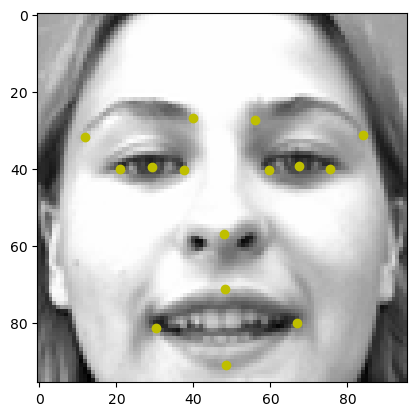

In [10]:
plot_image_landmarks(new_features, keypoints, 7)

In [11]:
#split dataset
x_train, x_test, y_train, y_test = train_test_split(new_features, keypoints, test_size=0.3)